<a href="https://colab.research.google.com/github/SutamaSarkar/RealiabilitySimulation/blob/main/CapaDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
from scipy.stats import norm
N=1000000
a=0
b=1
sum=0

meuc=1000
meud=800
sigmasqc=22500
sigmasqd=10000
meu=(meuc-meud)
sigma= math.sqrt(sigmasqc+sigmasqd)

z=(meu/sigma)
Rel=norm.cdf(z)

print("Analytical value= ",Rel)
for i in range(N):
    c = random.normalvariate(meuc, 150)
    d = random.normalvariate(meud, 100)

    if c<=d:
        sum +=1
    else:
        pass
z=1-(sum/N)
print("Experimental value =",z)

percentageerror=abs(((z-Rel)/Rel)*100)
print("Percentage error(%) =",percentageerror)

Analytical value=  0.8663712534228061
Experimental value = 0.866559
Percentage error(%) = 0.02167045322108217



Analytical Reliability = 0.8663712534228061

TRIALS	EXPERIMENTAL	PERCENT ERROR (%)
------------------------------------------------
100     	0.920000	6.1900
1000    	0.859000	0.8508
10000   	0.869600	0.3727
100000  	0.866510	0.0160


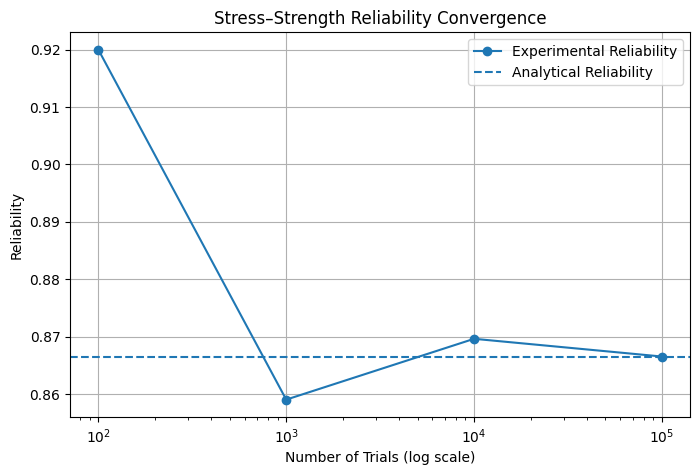

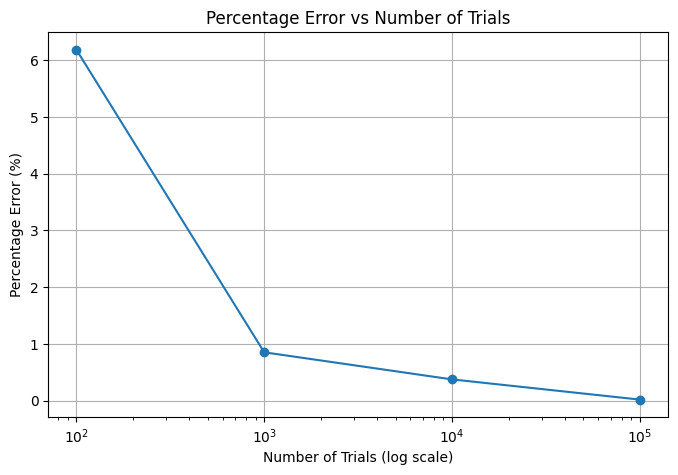

In [ ]:
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

# ---------------- PARAMETERS ----------------

meuc = 1000
meud = 800

sigmasqc = 22500
sigmasqd = 10000

sigma_c = math.sqrt(sigmasqc)
sigma_d = math.sqrt(sigmasqd)

meu = meuc - meud
sigma = math.sqrt(sigmasqc + sigmasqd)

# ---------------- ANALYTICAL RELIABILITY ----------------

z_analytical = meu / sigma
Rel = norm.cdf(z_analytical)

print("\nAnalytical Reliability =", Rel)

# ---------------- TRIAL LIST ----------------

trial_list = [100, 1000, 10000, 100000]

experimental_vals = []
error_vals = []

print("\nTRIALS\tEXPERIMENTAL\tPERCENT ERROR (%)")
print("------------------------------------------------")

for N in trial_list:

    success = 0

    for _ in range(N):
        c = random.normalvariate(meuc, sigma_c)
        d = random.normalvariate(meud, sigma_d)

        if c > d:
            success += 1

    experimental = success / N
    percent_error = abs((experimental - Rel) / Rel) * 100

    experimental_vals.append(experimental)
    error_vals.append(percent_error)

    print(f"{N:<8}\t{experimental:.6f}\t{percent_error:.4f}")

# ================== PLOTTING ==================

# Reliability convergence
plt.figure(figsize=(8,5))
plt.plot(trial_list, experimental_vals, marker='o', label="Experimental Reliability")
plt.axhline(Rel, linestyle='--', label="Analytical Reliability")
plt.xscale("log")
plt.xlabel("Number of Trials (log scale)")
plt.ylabel("Reliability")
plt.title("Stress–Strength Reliability Convergence")
plt.grid(True)
plt.legend()
plt.show()

# Percentage error convergence
plt.figure(figsize=(8,5))
plt.plot(trial_list, error_vals, marker='o')
plt.xscale("log")
plt.xlabel("Number of Trials (log scale)")
plt.ylabel("Percentage Error (%)")
plt.title("Percentage Error vs Number of Trials")
plt.grid(True)
plt.show()
